# ☁ Exploratory Data Analysis on Weather Typisch Dataset ☁
Untuk praktikum kali ini, kami:
1. Aidin Ferarista Zakariyah - 5054231025
2. M. Naufal Arifin - 5054231006

Akan melakukan Exploratory Data Analysis pada dataset cuaca.

## Data:
Data yang kami gunakan pada praktikum kali ini kami dapatkan dari Kaggle `https://www.kaggle.com/datasets/nikhil7280/weather-type-classification`.

Data ini berisi data-data cuaca, yang bisa saja digunakan untuk melakukan classification terhadap data type, tapi kali ini kami hanya akan melakukan EDA terhadap data tersebut.

### Metadata:
* Temperature : Temperatur dalam suhu Celcius `numeric`
* Humidity : Humidity (kelembapan) dalam format persentase `%` `numeric`
* Precipitation : Persentase presipitasi `%`, termasuk nilai pencilan.
* Cloud Cover : Deskripsi tentang tutupan awan `categorical`.
* Atmospheric Pressure : Tekanan atmosfer dalam hPa, mencakup rentang yang luas `numeric`.
* UV Index : Indeks UV, yang menunjukkan kekuatan radiasi ultraviolet `numeric`.
* Season : Musim saat data direkam.
* Visibility : Jarak pandang dalam kilometer `km`, termasuk nilai yang sangat rendah atau sangat tinggi `numeric`.
* Location : Jenis lokasi di mana data direkam `categorical`.
* Weather Type : Variabel target untuk klasifikasi `categorical`, yang menunjukkan jenis cuaca.

## Importing Module
Modul yang kami gunakan adalah sebagai berikut:
1. Pandas - 🐼 pandas digunakan untuk memproses data kedalam bentuk tabular
2. Matplotlib - plt digunakan untuk membuat plot terhadap data yang digunakan
3. Seaborn - ya sama kyk matplotlib, tergantung mood mau make yang mana
4. numpy - 😶

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL.ImageColor import colormap

## Importing dataset

Melakukan importing pada dataset yang akan digunakan

Note: Upload dulu ya bang ke menu `files`

In [2]:
df = pd.read_csv('data/weather_classification_data.csv')

In [256]:
df.head()

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy

## Exploratory Data Analysis

Di section ini kami akan melakukan beberapa EDA dasar untuk memahami data yang digunakan.


Berikut adalah beberapa langkah yang akan kami lakukan:

1. Mendapatkan pemahaman dasar terhadap data secara umum
2. Visualisasi Data

### Basic understanding on the data

In [257]:
df.describe()

Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          13200.000000  13200.000000     13200.000000  
mean            1005.827896      4.005758         5.462917  
std               37.199589      3.856600         3.371499  
min              800.120000      0.000000         0.000000  
25%              994.800000      1.000000         3.000000  
50%             1007.650000      3.000000         5.000000  
75%             1016.772500      7.000000         7.500000  
max             1199.210000     14.000000        20.000000

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


Mendapatkan pemahaman umum terkaid data yang digunakan dengan `.describe() & .info()`

In [259]:
df.nunique()

Temperature              126
Humidity                  90
Wind Speed                97
Precipitation (%)        110
Cloud Cover                4
Atmospheric Pressure    5456
UV Index                  15
Season                     4
Visibility (km)           41
Location                   3
Weather Type               4
dtype: int64

Menggunakan `.nunique()` untuk medapatkan informasi mengenai jumlah unique value dari setiap fitur

In [260]:
df['Weather Type'].unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

In [261]:
df['Location'].unique()

array(['inland', 'mountain', 'coastal'], dtype=object)

In [262]:
df['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

Menggunakan `.unique()` untuk mendapatkan informasi terkait unique value yang ada di masing-masing fitur

In [263]:
df.isna().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [264]:
df.duplicated().sum()

0

Menggunakan `.isna().sum()` untuk mengetahui apakah ada missing values di data tersebut.

GA ADA??? baguslah


In [265]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

In [266]:
cat_cols

Index(['Cloud Cover', 'Season', 'Location', 'Weather Type'], dtype='object')

In [267]:
num_cols

['Temperature',
 'Humidity',
 'Wind Speed',
 'Precipitation (%)',
 'Atmospheric Pressure',
 'UV Index',
 'Visibility (km)']

Mendapatkan list data dari masing masing dtype (categorical & numerical)

In [4]:
def check_outlier(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers

In [10]:
outlier_temp = check_outlier(df, 'Temperature')
outlier_ap = check_outlier(df, 'Atmospheric Pressure')

In [11]:
outlier_ap

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
10            35.0        45         6.0               86.0  partly cloudy   
38            -9.0        49         1.5               58.0  partly cloudy   
58            31.0        70         0.5               69.0       overcast   
72            11.0        52         6.0               97.0       overcast   
85            32.0        35         2.5               63.0  partly cloudy   
...            ...       ...         ...                ...            ...   
13167         33.0        73         5.0               31.0  partly cloudy   
13168         44.0        45         7.0               28.0  partly cloudy   
13178          0.0        50        11.5               82.0         cloudy   
13184          3.0        62         7.5               14.0       overcast   
13196         -1.0        76         3.5               23.0         cloudy   

       Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
10                   879.88         2  Spring              1.0  mountain   
38                  1132.20         8  Spring             16.5  mountain   
58                  1074.07         3  Spring             12.5    inland   
72                  1063.39         7  Summer             12.5    inland   
85                  1160.48         2  Winter              0.0   coastal   
...                     ...       ...     ...              ...       ...   
13167                840.06         9  Spring             10.5   coastal   
13168                894.65         5  Spring             11.5    inland   
13178                822.40         8  Spring             15.5   coastal   
13184               1128.35         3  Summer              7.5  mountain   
13196               1067.23         1  Winter              6.0   coastal   

      Weather Type  
10          Cloudy  
38           Snowy  
58           Sunny  
72           Snowy  
85           Sunny  
...            ...  
13167       Cloudy  
13168        Sunny  
13178       Cloudy  
13184        Rainy  
13196        Snowy  

[927 rows x 11 columns]

### Data Visualization


Di section ini kami akan melakukan beberapa visualisasi data, data-data akan divisualisasikan dengan beberapa metode.

* Univariat - Melakukan visualisasi hanya dengan informasi dari 1 fitur (e.g boxplot, histogram, piechart, dll)
* Bivariat - Melakukan visualisasi dengan informasi dari 2 fitur (e.g barplot, lineplot, scatterplot, dll)
* Multivariat - Melakukan visualisasi dengan informasi dari lebih dari 2 fitur (e.g Pairplot)

#### Univariate Data Visualization
Melakukan visualisasi hanya dengan informasi dari 1 fitur

Temperature
Skew : 0.22


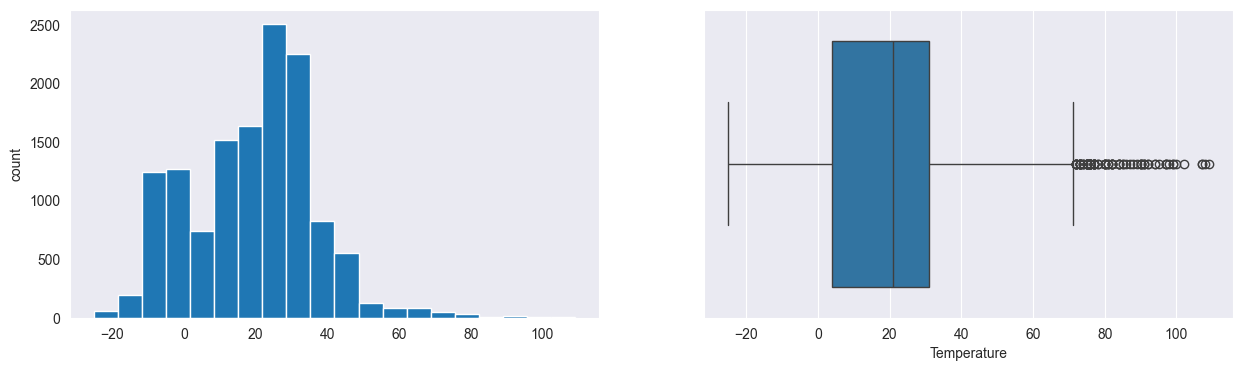

Humidity
Skew : -0.4


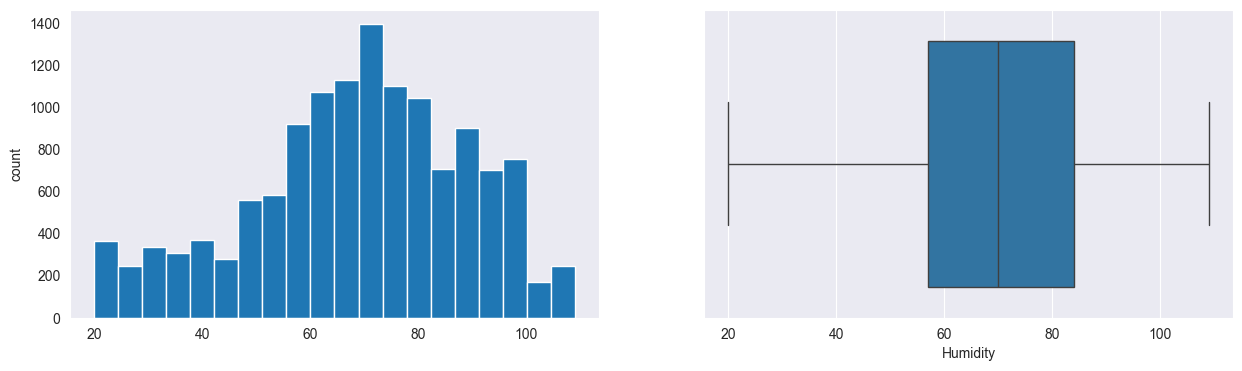

Wind Speed
Skew : 1.36


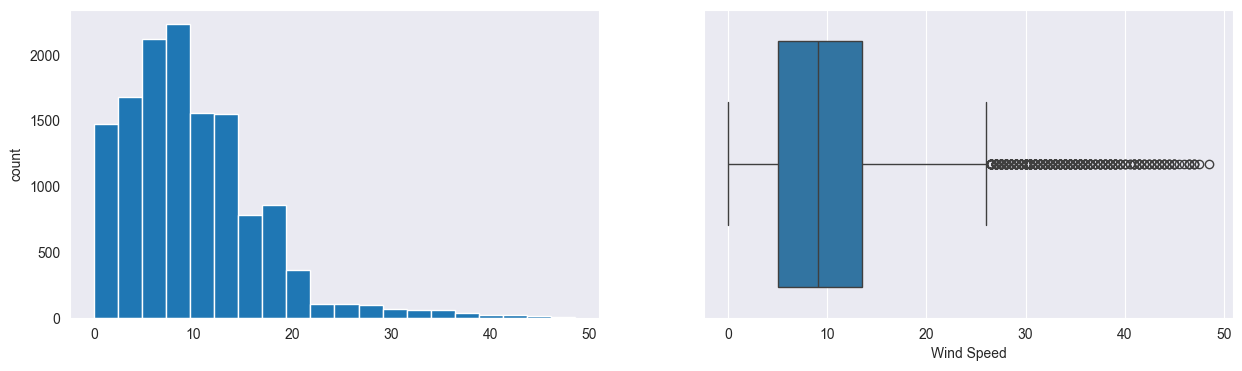

Precipitation (%)
Skew : -0.15


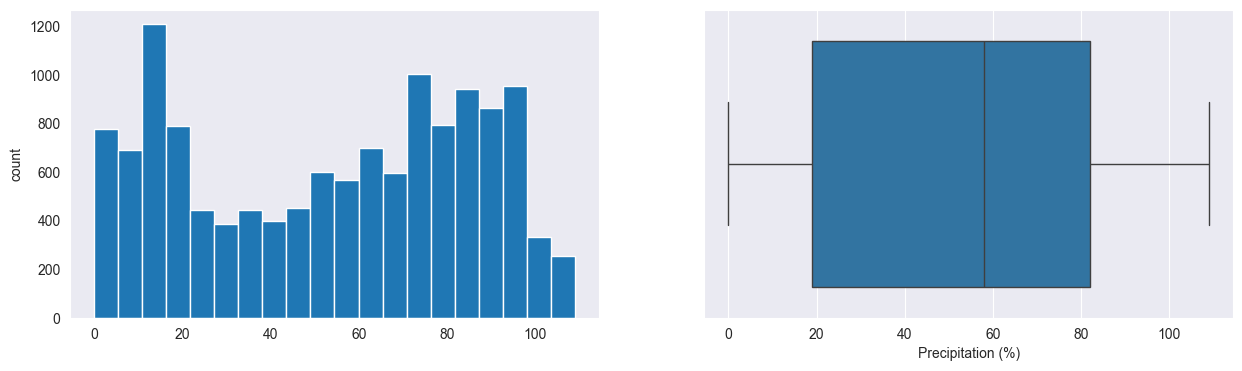

Atmospheric Pressure
Skew : -0.29


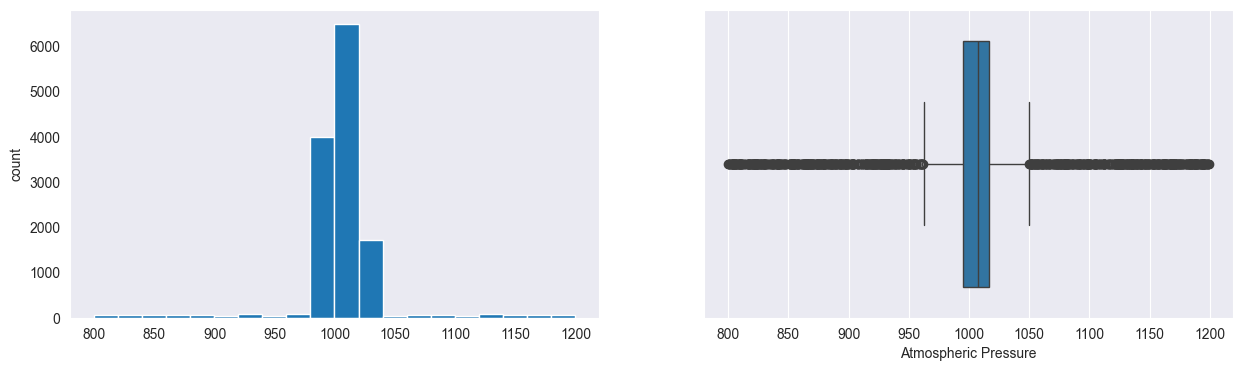

UV Index
Skew : 0.9


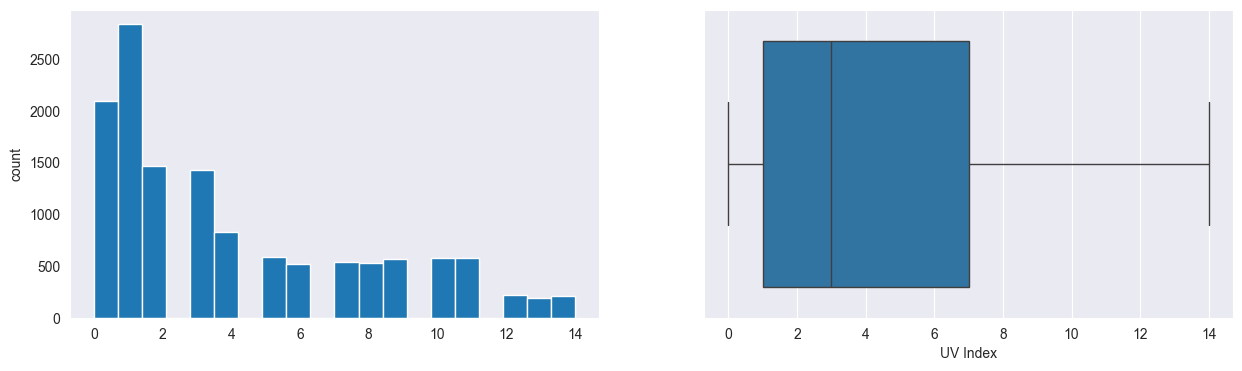

Visibility (km)
Skew : 1.23


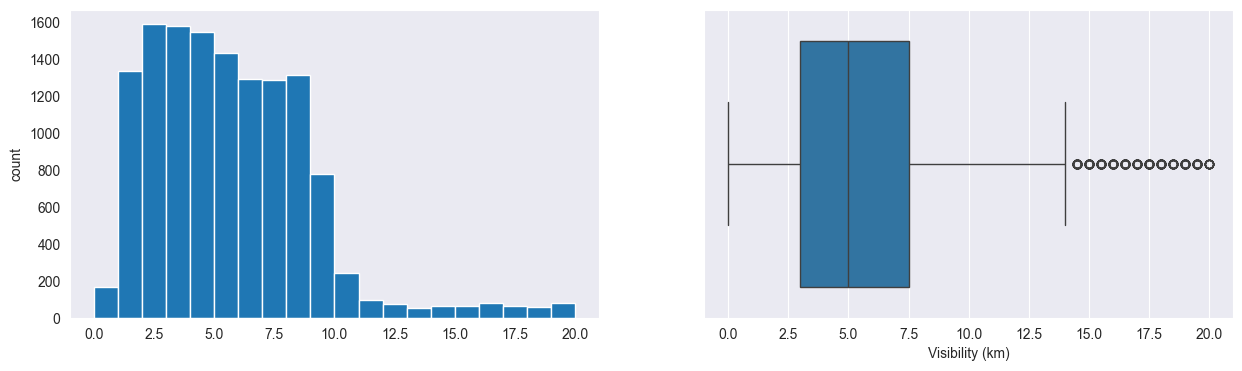

In [268]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False,
                 bins=20)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

Dengan beberapa visualisasi di atas, kita dapat mendapatkan beberapa informasi mengenai distribusi dari masing-masing numerical value.

In [269]:
cat_cols

Index(['Cloud Cover', 'Season', 'Location', 'Weather Type'], dtype='object')

''

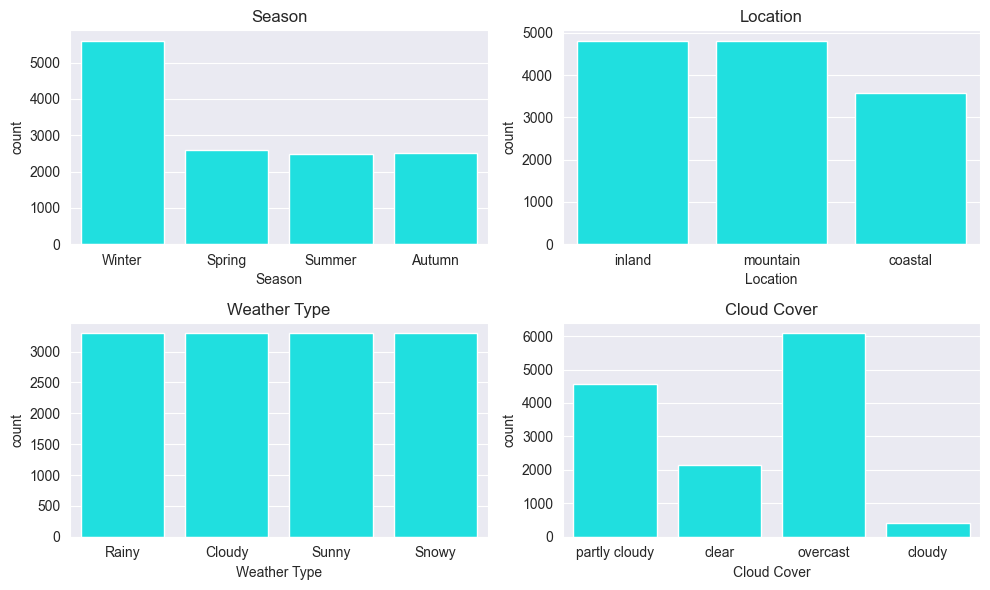

In [270]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
ax1, ax2, ax3, ax4 = axes.flatten()

sns.countplot(x="Season",
              data = df,
              color='aqua',
              ax=ax1)
ax1.set_title('Season')

sns.countplot(x="Location",
              data = df,
              color='aqua',
              ax=ax2)
ax2.set_title('Location')

sns.countplot(x="Weather Type",
              data = df,
              color='aqua',
              ax=ax3)
ax3.set_title('Weather Type')

sns.countplot(x="Cloud Cover",
              data = df,
              color='aqua',
              ax=ax4)
ax4.set_title('Cloud Cover')

plt.tight_layout()
;


Mendapatkan informasi terkait visualisasi jumlah dari masing masing categorical value, dari data diatas kita dapat menarik kesimpulan bahwa:
1. Jumlah target variable `(Weather Type)` merata

#### Bivariate Data Visualization

Melakukan visualisasi dengan informasi dari 2 fitur

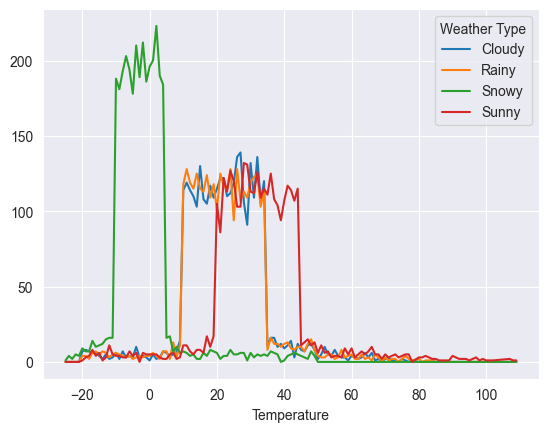

In [271]:
pd.crosstab(df['Temperature'], df['Weather Type']).plot();

Grafik diatas menunjukkan bahwa beberapa jenis cuaca hanya terjadi di temperatur tertentu

In [272]:
num_cols

['Temperature',
 'Humidity',
 'Wind Speed',
 'Precipitation (%)',
 'Atmospheric Pressure',
 'UV Index',
 'Visibility (km)']

''

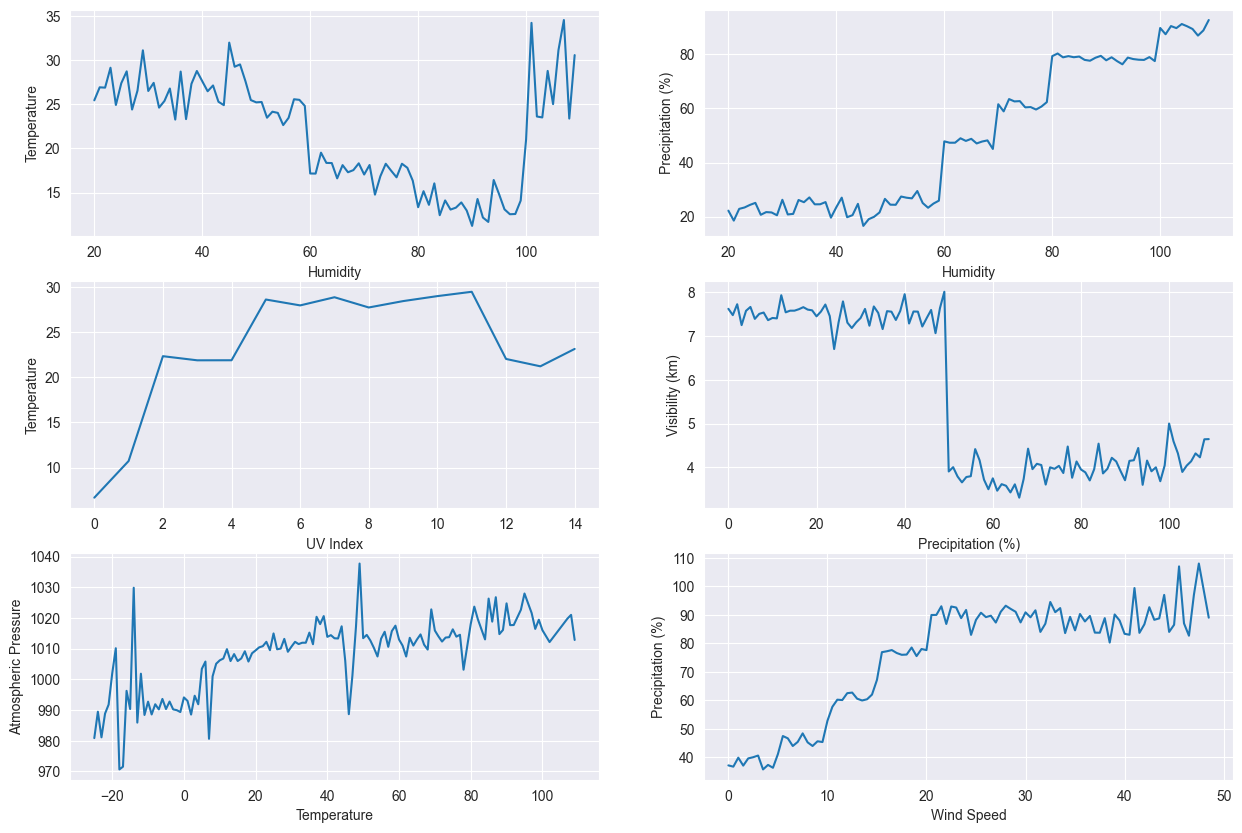

In [273]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten()

sns.lineplot(data=df,
             x='Humidity',
             y='Temperature',
             errorbar=None,
             ax=ax1)

sns.lineplot(data=df,
             x='Humidity',
             y='Precipitation (%)',
             errorbar=None,
             ax=ax2)

sns.lineplot(data=df,
             x='UV Index',
             y='Temperature',
             errorbar=None,
             ax=ax3)

sns.lineplot(data=df,
             x='Precipitation (%)',
             y='Visibility (km)',
             errorbar=None,
             ax=ax4)

sns.lineplot(data=df,
             y='Atmospheric Pressure',
             x='Temperature',
             errorbar=None,
             ax=ax5)

sns.lineplot(data=df,
             x='Wind Speed',
             y='Precipitation (%)',
             errorbar=None,
             ax=ax6)

;

Beberapa visualisasi diatas digunakan untuk membandingkan 2 fitur, dan mencari informasi dari 2 fitur tersebut.

Kesimpulan:
* Semakin tinggi kelembapan, maka temperatur semakin rendah. Kecuali pada kondisi tertentu di saat kelembapan menyentuh 100%
* Curah hujan meningkat seiring dengan meningkatnya kelembapan
* Kenaikan temperature cenderung linear terhadap kenaikan UV Index
* Jarak pandang cenderung stabil pada level yang tinggi hingga curah hujan mencapai sekitar 60%.kemudian, ada penurunan tajam dalam jarak pandang, yang mungkin disebabkan oleh hujan lebat atau kabut yang mengurangi visibilitas
* Ada hubungan positif antara curah hujan dan kecepatan angin, di mana kecepatan angin meningkat saat curah hujan meningkat

''

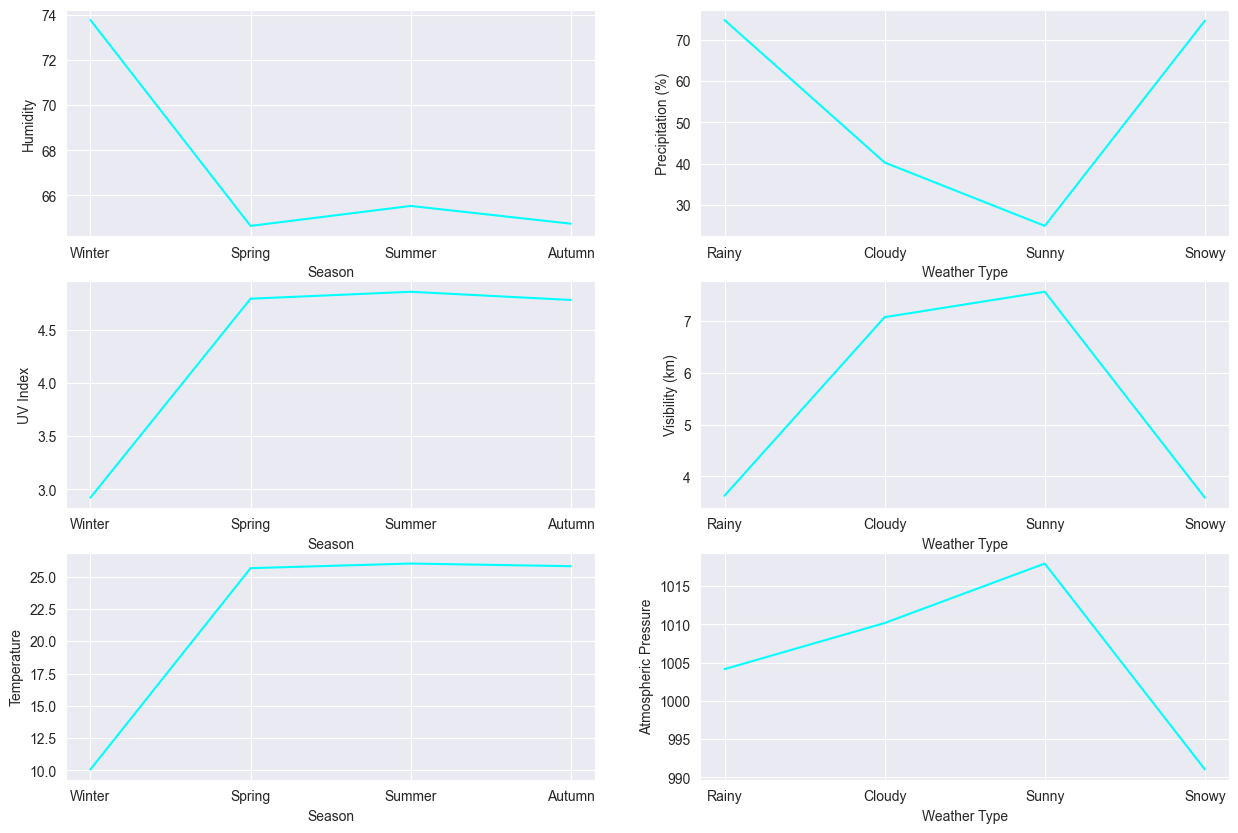

In [274]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten()

sns.lineplot(data=df,
             x='Season',
             y='Humidity',
             errorbar=None,
             color='aqua',
             ax=ax1)

sns.lineplot(data=df,
             x='Weather Type',
             y='Precipitation (%)',
             errorbar=None,
             color='aqua',
             ax=ax2)

sns.lineplot(data=df,
             x='Season',
             y='UV Index',
             errorbar=None,
             color='aqua',
             ax=ax3)

sns.lineplot(data=df,
             x='Weather Type',
             y='Visibility (km)',
             errorbar=None,
             color='aqua',
             ax=ax4)

sns.lineplot(data=df,
             x='Season',
             y='Temperature',
             errorbar=None,
             color='aqua',
             ax=ax5)

sns.lineplot(data=df,
             x='Weather Type',
             y='Atmospheric Pressure',
             errorbar=None,
             color='aqua',
             ax=ax6)
;

Grafik-grafik diatas menunjukkan bahwa beberapa fitur bisa berkorelasi terkait musim dan jenis cuaca. 

Beberapa kesimpulan yang dapat ditarik dari grafik diatas:
* Kelembapan berada di titik paling tinggi di musim dingin, dan mencapai titik terendah di musim semi dan gugur. Ini menunjukkan bahwa musim dapat mempengaruhi kelembapan udara
* Curah hujan juga berkorelasi langsung dengan jenis cuaca.
* Dan sebagainya...

In [275]:
df_corr = df.copy()

In [276]:
from sklearn.preprocessing import LabelEncoder

le_Cloud_Cover = LabelEncoder()
le_Season = LabelEncoder()

le_Location  = LabelEncoder()
le_Weather_Type  = LabelEncoder()


df_corr['Cloud Cover'] = le_Cloud_Cover.fit_transform(df_corr['Cloud Cover'])
df_corr['Season'] = le_Season.fit_transform(df_corr['Season'])
df_corr['Location'] = le_Location.fit_transform(df_corr['Location'])
df_corr['Weather Type'] = le_Weather_Type.fit_transform(df_corr['Weather Type'])

Melakukan feature encoding terhadap masing-masing categorical feature dengan bantuan LabelEncoder

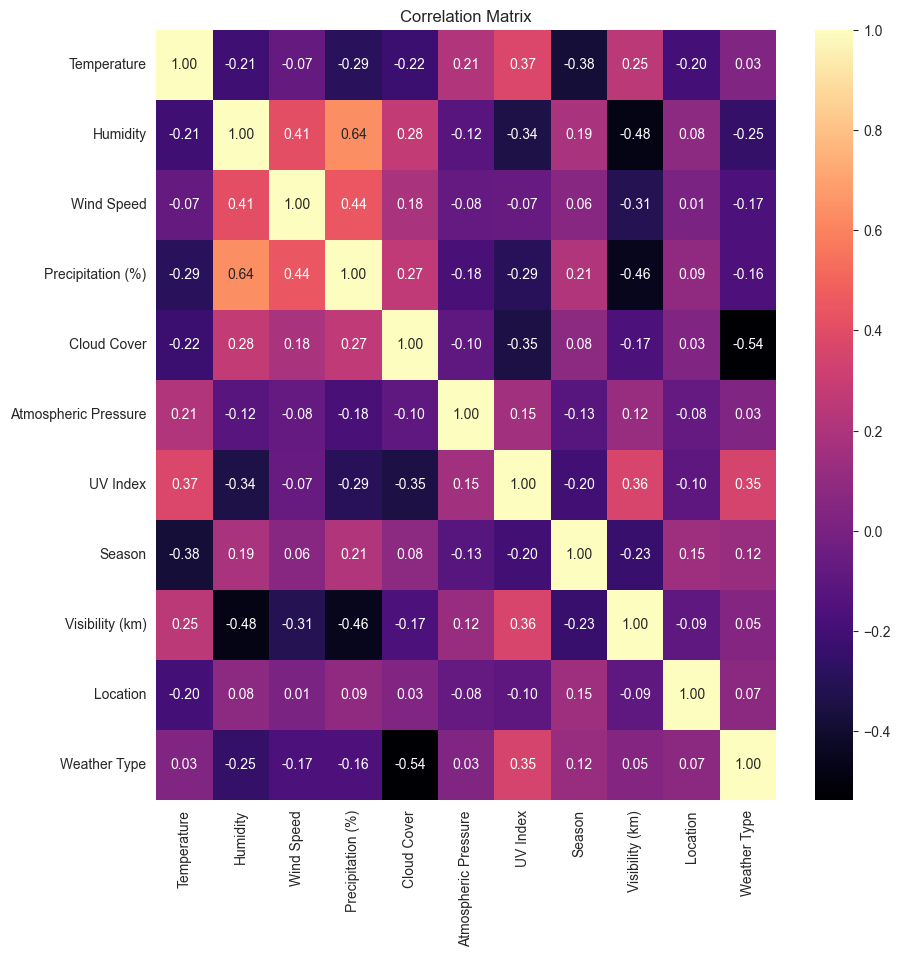

In [307]:
correlation_matrix = df_corr.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix,annot=True, cmap='magma', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Grafik diatas adalah correlation matrix dari masing masing numerical feature. Correlation matrix berguna untuk melihat nilai korelasi antar fitur, dimana apabila nilai mendekati angka 1 dari 0 maka semakin positif korelasinya.

berikut adalah penjelasan ringkas tentang cara membaca corr matrix:
* corr = 1 - Berarti fitur-fitur tersebut berkorelasi sempurna secara positif (jika salah fitur naik, maka fitur satunya lagi juga naik)
* corr = -1 - berarti fitur-fitur tersebut berkorelasi sempurna secara negatif (juka salah satu fitur turun, maka fitur satunya lagi juga turun)
* corr = 0 - berarti fitur-fitur tidak berkorelasi

**Note: korelasi positif [0=>1] sementara korelasi negatif [0=>1]**

#### Multivatiate Data Visualization

Multivariat - Melakukan visualisasi dengan informasi dari lebih dari 2 fitur (e.g Pairplot)


<Figure size 2000x2000 with 0 Axes>

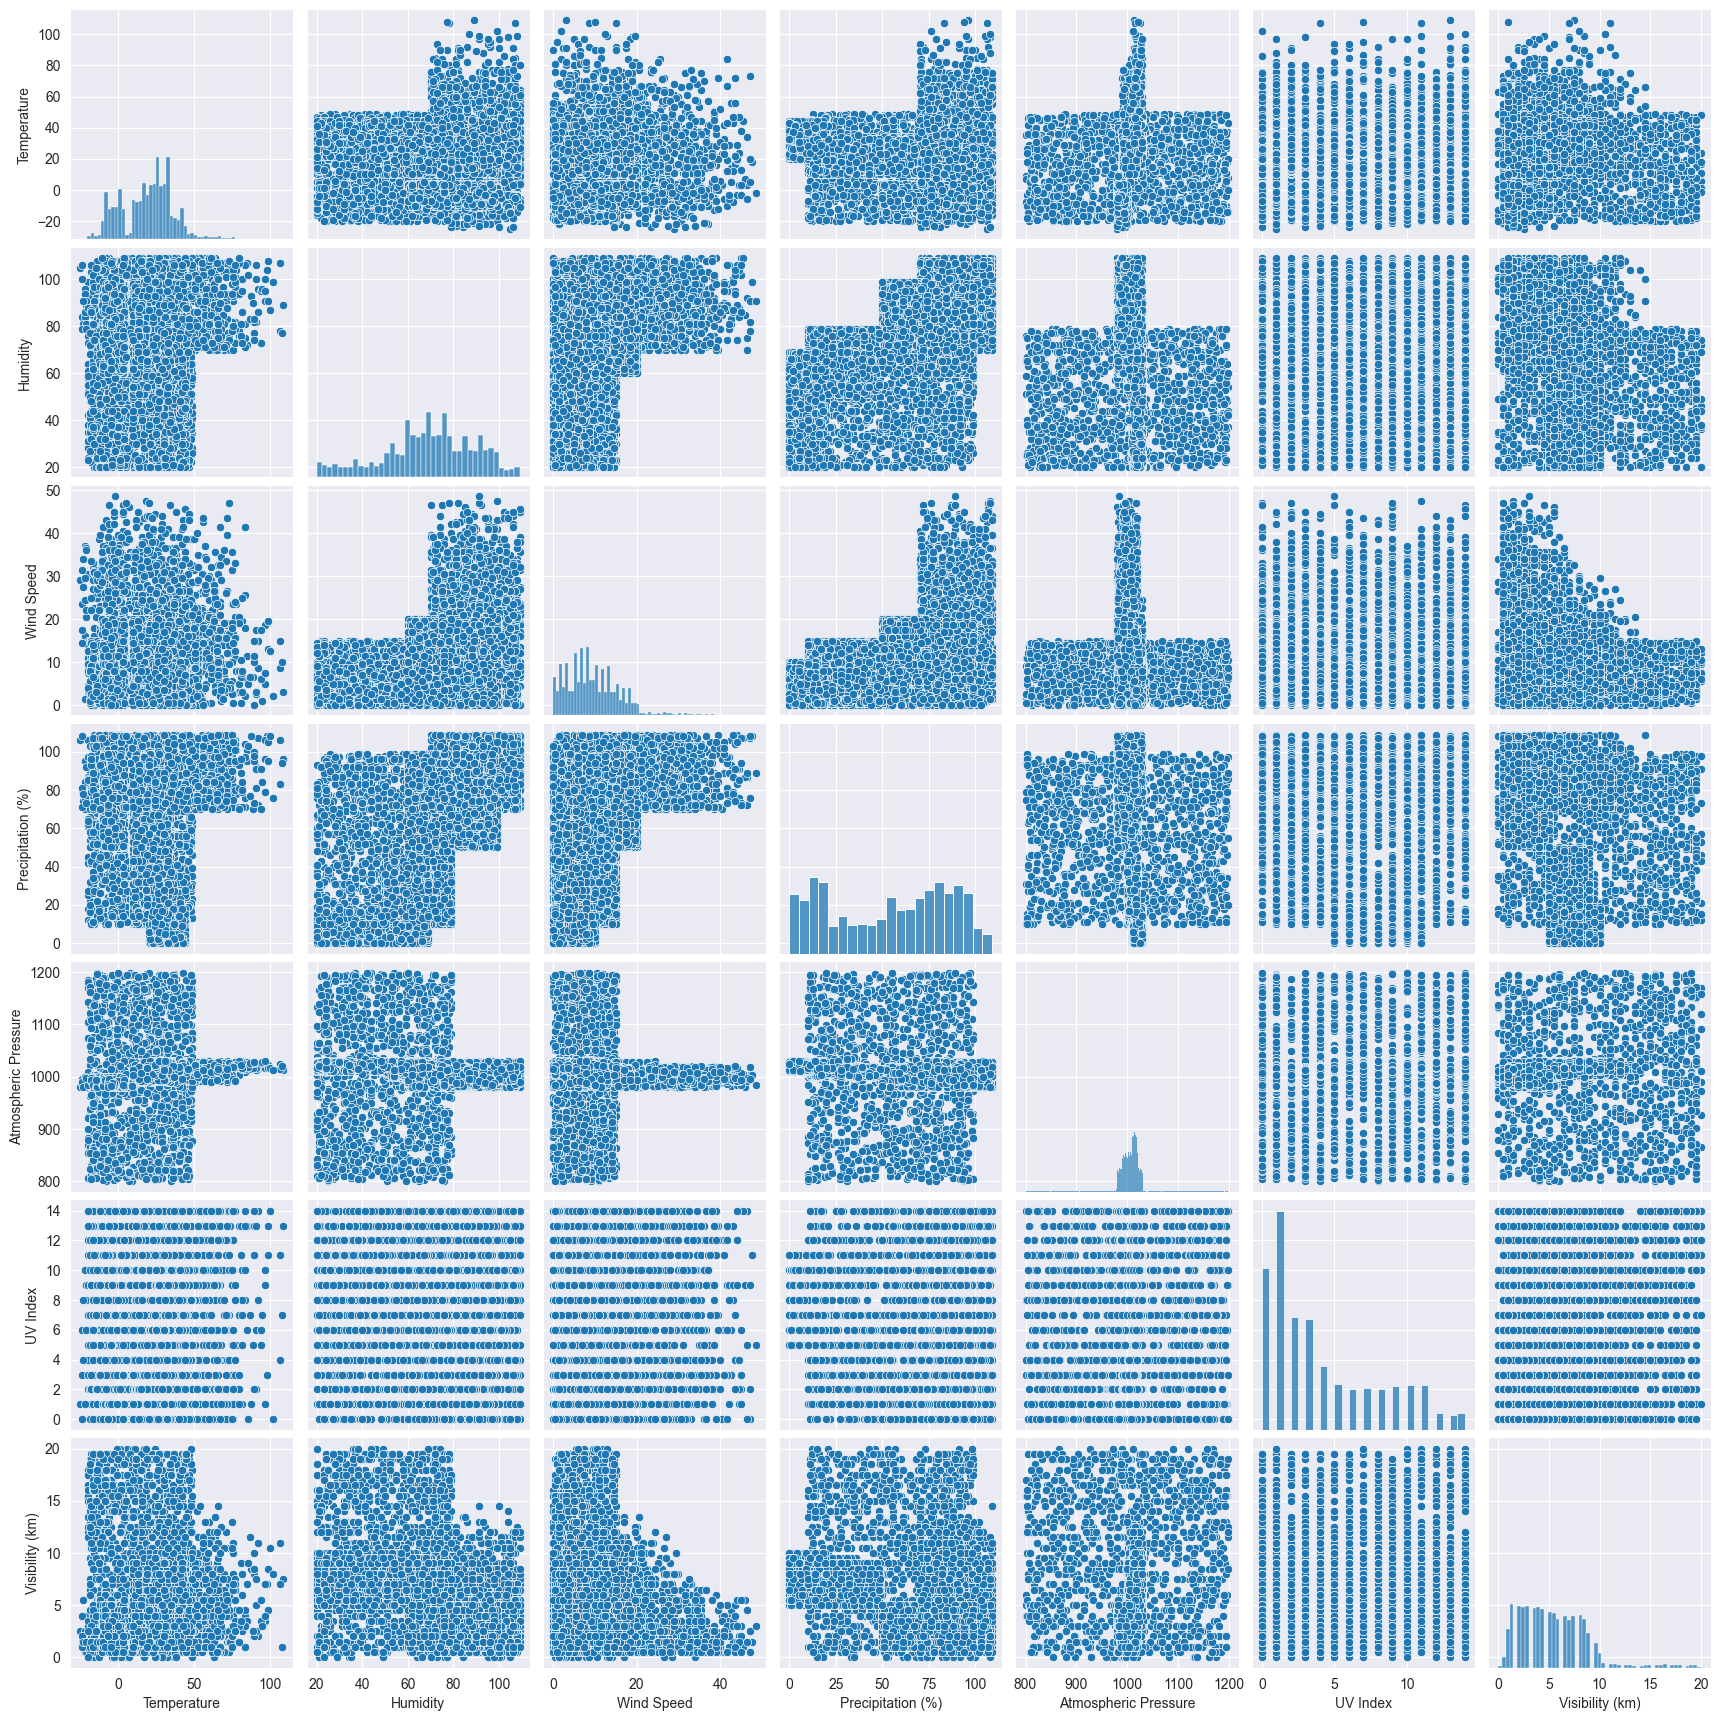

In [278]:
plt.figure(figsize=(20,20))
sns.pairplot(data=df)
plt.show();

Mohon maaf pak saya juga bingung kalo disuruh baca ini:(

''

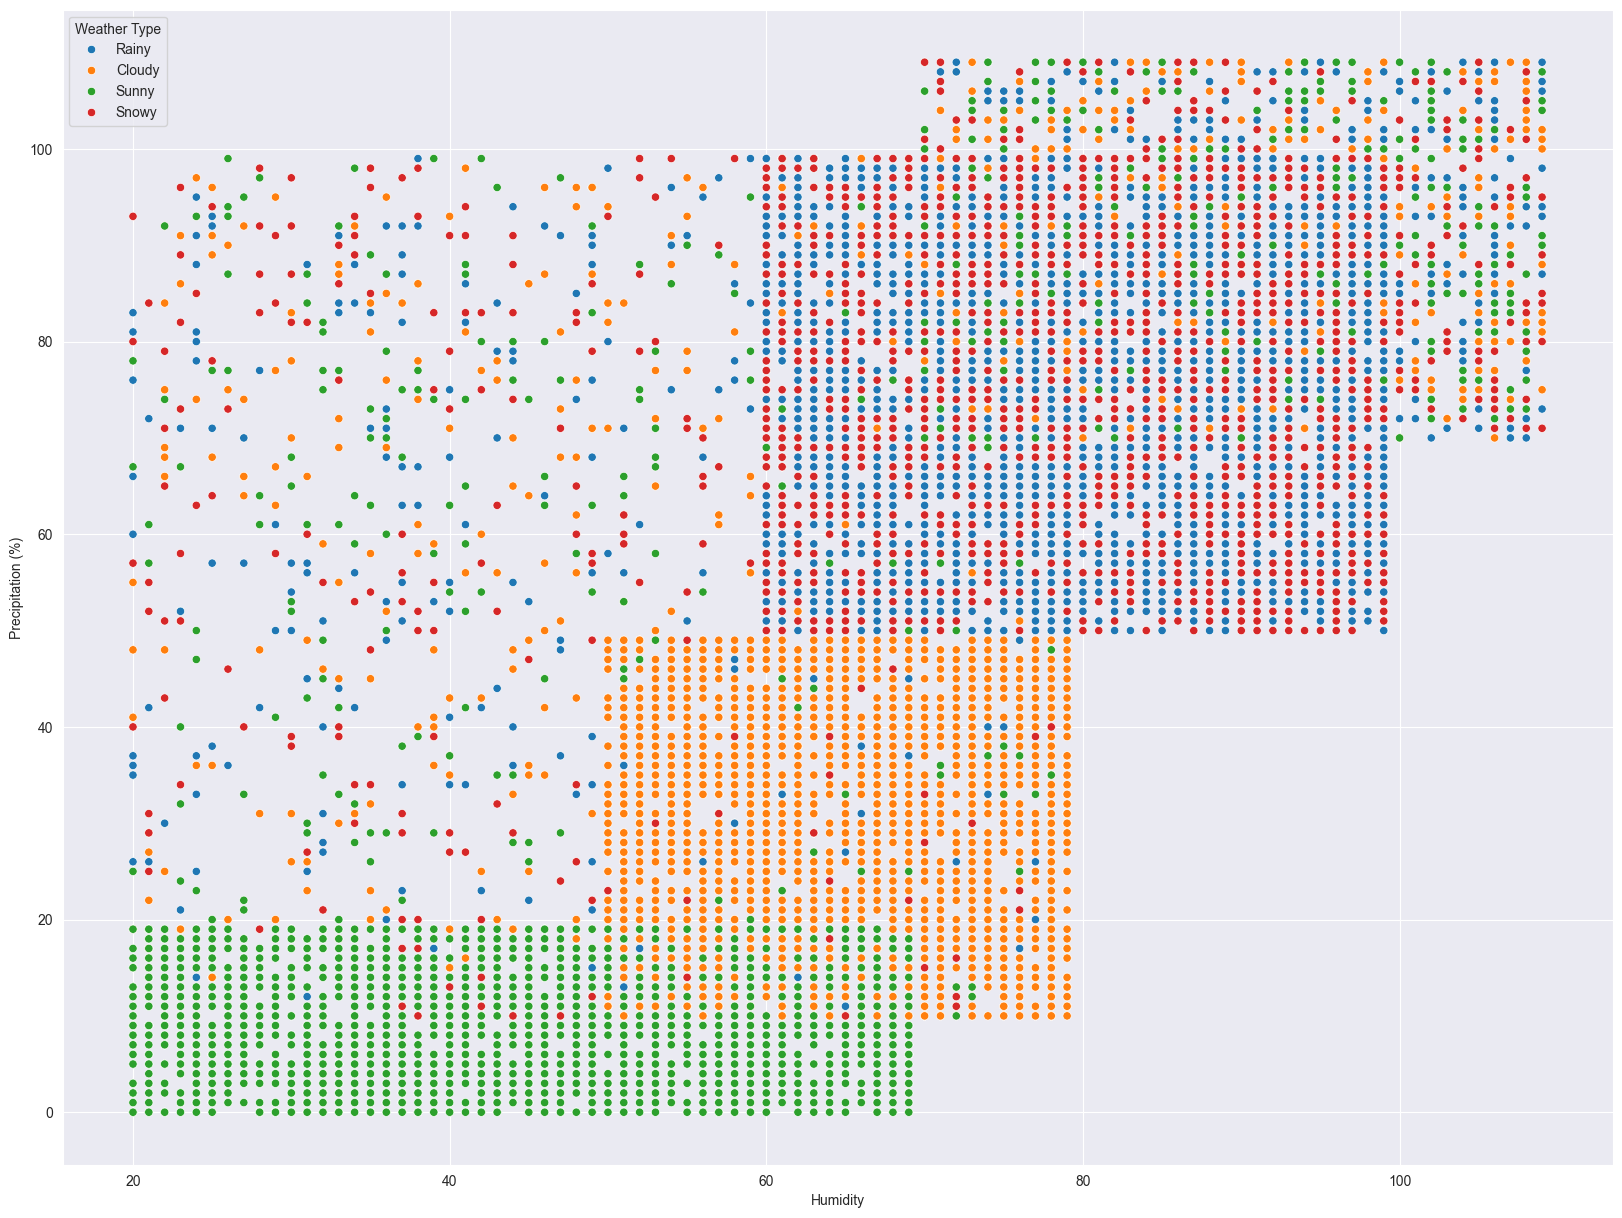

In [279]:
plt.figure(figsize=(20,15))
sns.scatterplot(data=df,
                x='Humidity',
                y='Precipitation (%)',
                hue='Weather Type')
;

Plot ini menjelaskan bahwa perbandingan antara kelembapan dan curah hujan juga dapat menentukan jenis cuaca saat itu.

Kesimpulan yang dapat diambil:
1. Jenis cuaca cerah terjadi saat kelembapan dan curah hujan juga rendah
2. Jenis cuaca mendung rata-rata terjadi disaat kelembapan berada di atas 50% dan curah hujan diatas 10%.
3. Dan seterusnya...
4. Masih banyak outliers ya bund

''

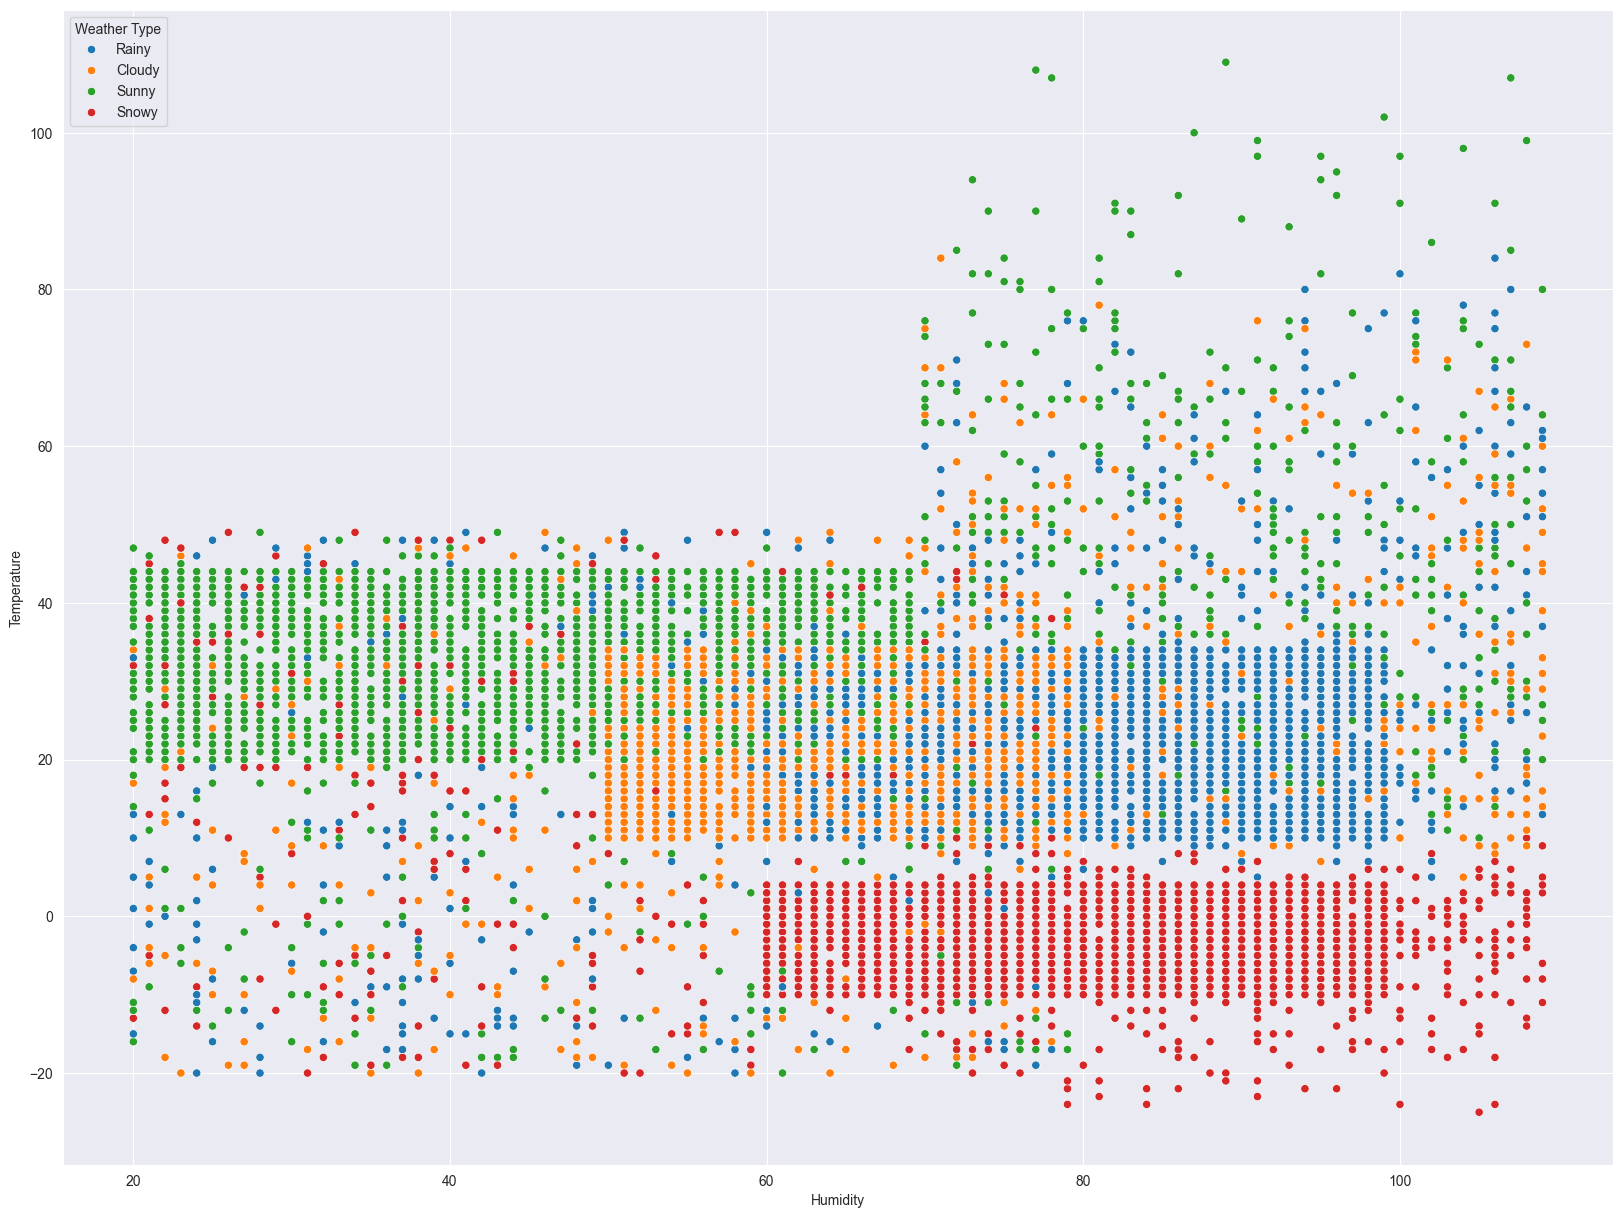

In [280]:
plt.figure(figsize=(20,15))
sns.scatterplot(data=df,
                x='Humidity',
                y='Temperature',
                hue='Weather Type')
;

Yang ini juga kurang lebih sama seperti yang diatas, dimana jenis cuaca bisa diprediksi dengan cara membandingkan kelembapan dengan temperatur

## Bonus hehe

In [281]:
import tensorflow as tf
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras import regularizers

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [282]:
df_ml = df.copy()

In [283]:
df_ml.head().T

0              1         2        3  \
Temperature                    14.0           39.0      30.0     38.0   
Humidity                         73             96        64       83   
Wind Speed                      9.5            8.5       7.0      1.5   
Precipitation (%)              82.0           71.0      16.0     82.0   
Cloud Cover           partly cloudy  partly cloudy     clear    clear   
Atmospheric Pressure        1010.82        1011.43   1018.72  1026.25   
UV Index                          2              7         5        7   
Season                       Winter         Spring    Spring   Spring   
Visibility (km)                 3.5           10.0       5.5      1.0   
Location                     inland         inland  mountain  coastal   
Weather Type                  Rainy         Cloudy     Sunny    Sunny   

                             4  
Temperature               27.0  
Humidity                    74  
Wind Speed                17.0  
Precipitation (%)         66.0  
Cloud Cover           overcast  
Atmospheric Pressure    990.67  
UV Index                     1  
Season                  Winter  
Visibility (km)            2.5  
Location              mountain  
Weather Type             Rainy

In [284]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le_cloud_cover = LabelEncoder()
le_season = LabelEncoder()
le_location = LabelEncoder()
enc_weather_type = OneHotEncoder()

df_ml['Cloud Cover'] = le_cloud_cover.fit_transform(df_ml['Cloud Cover'])
df_ml['Season'] = le_season.fit_transform(df_ml['Season'])
df_ml['Location'] = le_location.fit_transform(df_ml['Location'])

weather_encoded = enc_weather_type.fit_transform(df_ml[['Weather Type']]).toarray()
df_ml = df_ml.join(pd.DataFrame(weather_encoded, columns=enc_weather_type.get_feature_names_out(['Weather Type']))).drop('Weather Type', axis=1)

In [285]:
df_ml.head().T

0        1        2        3       4
Temperature             14.00    39.00    30.00    38.00   27.00
Humidity                73.00    96.00    64.00    83.00   74.00
Wind Speed               9.50     8.50     7.00     1.50   17.00
Precipitation (%)       82.00    71.00    16.00    82.00   66.00
Cloud Cover              3.00     3.00     0.00     0.00    2.00
Atmospheric Pressure  1010.82  1011.43  1018.72  1026.25  990.67
UV Index                 2.00     7.00     5.00     7.00    1.00
Season                   3.00     1.00     1.00     1.00    3.00
Visibility (km)          3.50    10.00     5.50     1.00    2.50
Location                 1.00     1.00     2.00     0.00    2.00
Weather Type_Cloudy      0.00     1.00     0.00     0.00    0.00
Weather Type_Rainy       1.00     0.00     0.00     0.00    1.00
Weather Type_Snowy       0.00     0.00     0.00     0.00    0.00
Weather Type_Sunny       0.00     0.00     1.00     1.00    0.00

In [293]:
from sklearn.model_selection import train_test_split

X = df_ml.drop(['Weather Type_Cloudy', 'Weather Type_Rainy', 'Weather Type_Snowy', 'Weather Type_Sunny'], axis=1)
y = df_ml.iloc[:, -4:]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [287]:
y_train

Weather Type_Cloudy  Weather Type_Rainy  Weather Type_Snowy  \
3958                   0.0                 1.0                 0.0   
2239                   0.0                 1.0                 0.0   
3608                   0.0                 0.0                 0.0   
6848                   0.0                 1.0                 0.0   
6119                   1.0                 0.0                 0.0   
...                    ...                 ...                 ...   
11964                  0.0                 1.0                 0.0   
5191                   0.0                 1.0                 0.0   
5390                   1.0                 0.0                 0.0   
860                    1.0                 0.0                 0.0   
7270                   0.0                 1.0                 0.0   

       Weather Type_Sunny  
3958                  0.0  
2239                  0.0  
3608                  1.0  
6848                  0.0  
6119                  0.0  
...                   ...  
11964                 0.0  
5191                  0.0  
5390                  0.0  
860                   0.0  
7270                  0.0  

[10560 rows x 4 columns]

In [294]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

In [196]:
X_train.head()

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
3958         32.0        66         6.0               92.0  partly cloudy   
2239         15.0        96        11.0               57.0       overcast   
3608         28.0        58         6.5               11.0          clear   
6848         47.0        84        44.5               85.0       overcast   
6119         18.0        66        14.0               10.0  partly cloudy   

      Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  
3958               1010.21         2  Spring              1.5    inland  
2239               1016.98         0  Autumn              4.0  mountain  
3608               1025.37        10  Summer              9.0    inland  
6848                992.26         2  Winter              2.0   coastal  
6119               1000.04         1  Autumn              8.0   coastal

In [297]:
X_train_tensor = tf.convert_to_tensor(X_train)
y_train_tensor = tf.convert_to_tensor(y_train)
X_val_tensor = tf.convert_to_tensor(X_val)
y_val_tensor = tf.convert_to_tensor(y_val)

In [298]:
y_train_tensor

<tf.Tensor: shape=(10560, 4), dtype=float64, numpy=
array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])>

In [299]:
print(X_train_tensor.shape, y_train_tensor.shape)

(10560, 10) (10560, 4)


In [303]:
NN = tf.keras.models.Sequential([
    Input(shape=(10,)),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

In [304]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)
NN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [305]:
%%time
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = NN.fit(X_train_tensor, y_train_tensor, epochs=100, batch_size=64, validation_data=(X_val_tensor, y_val_tensor))

Epoch 1/100
165/165 [==============================] - 1s 6ms/step - loss: 1.0024 - accuracy: 0.7296 - val_loss: 0.6353 - val_accuracy: 0.8712
Epoch 2/100
165/165 [==============================] - 1s 5ms/step - loss: 0.6722 - accuracy: 0.8568 - val_loss: 0.5265 - val_accuracy: 0.8792
Epoch 3/100
165/165 [==============================] - 1s 4ms/step - loss: 0.5572 - accuracy: 0.8809 - val_loss: 0.4634 - val_accuracy: 0.8864
Epoch 4/100
165/165 [==============================] - 1s 4ms/step - loss: 0.4876 - accuracy: 0.8892 - val_loss: 0.4206 - val_accuracy: 0.8936
Epoch 5/100
165/165 [==============================] - 1s 4ms/step - loss: 0.4366 - accuracy: 0.8918 - val_loss: 0.3900 - val_accuracy: 0.8970
Epoch 6/100
165/165 [==============================] - 1s 4ms/step - loss: 0.4064 - accuracy: 0.8984 - val_loss: 0.3689 - val_accuracy: 0.8989
Epoch 7/100
165/165 [==============================] - 1s 4ms/step - loss: 0.3793 - accuracy: 0.8983 - val_loss: 0.3457 - val_accuracy: 0.9011

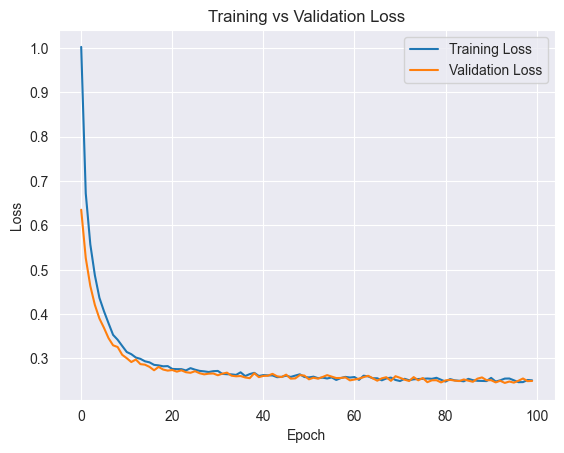

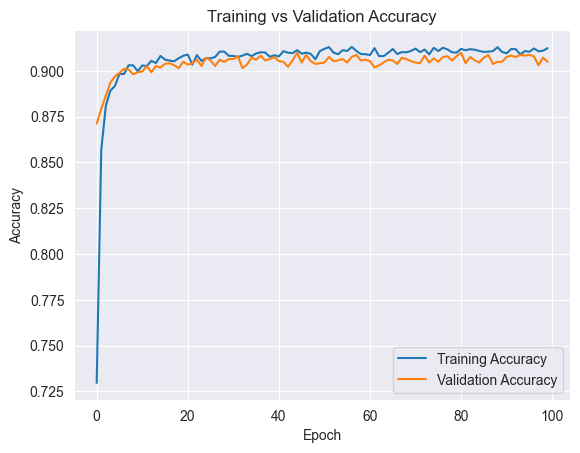

In [306]:
# Plotting training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

# Plotting training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()